In [3]:
#Load packages and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory=False)
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# Identify the shape of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [6]:
# Identify variables with null values
df.isnull().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [7]:
# Check how many null values are present in each column
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [8]:
# Drop empty columns
df = df.drop(['School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Garage Lot Name'], axis=1)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
# Show statistics for numerical columns.
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,40.912869,-73.700715


In [10]:
# Display city names
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [11]:
# Change all city names to title format
def to_title(city):
    try:
        city = city.title()
        return city
    except:
        return np.nan

df['City'] = df['City'].apply(to_title)
df['City'].value_counts()

Brooklyn               118862
New York                77312
Bronx                   49171
Staten Island           15340
Jamaica                  8932
Astoria                  8897
Flushing                 7487
Ridgewood                6392
Corona                   5383
Woodside                 4523
East Elmhurst            3588
Ozone Park               3446
Elmhurst                 3438
South Richmond Hill      3431
Long Island City         3198
Maspeth                  3118
Woodhaven                3103
South Ozone Park         2668
Fresh Meadows            2453
Richmond Hill            2335
Middle Village           2291
Queens Village           2251
Forest Hills             2122
Jackson Heights          2106
Rego Park                1807
Bayside                  1550
College Point            1544
Far Rockaway             1397
Whitestone               1369
Hollis                   1231
Howard Beach             1145
Springfield Gardens      1094
Rosedale                 1091
Saint Alba

In [12]:
# Display complaint types
df['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [13]:
# Count complain types by city.
df.groupby(['City', 'Complaint Type']).size()

City      Complaint Type         
Arverne   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Noise - Street/Sidewalk    266
          Noise - Vehicle            136
          Traffic                     45
          Urinating in Public          8
          Vending                     15
Length: 759, dtype: int64

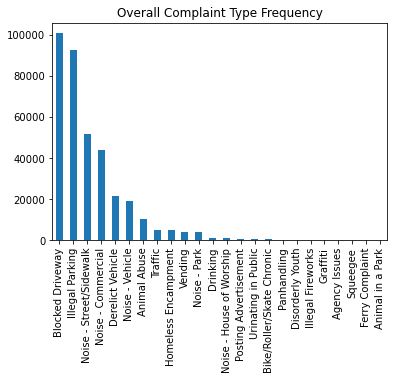

In [14]:
# Display frequency of overall complaint types
df['Complaint Type'].value_counts().plot(kind = 'bar', title = 'Overall Complaint Type Frequency');

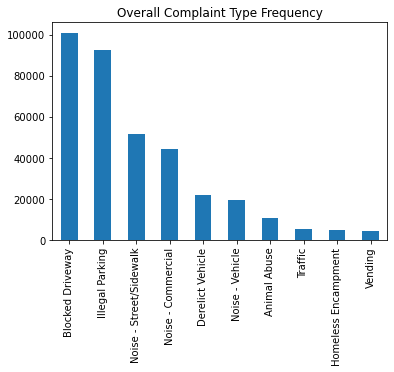

In [15]:
# Display frequency of top 10 overall complaint types
df['Complaint Type'].value_counts().head(10).plot(kind = 'bar', title = 'Overall Complaint Type Frequency');

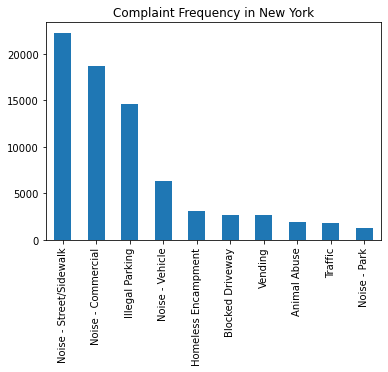

In [16]:
# Frequency chart for the ten most common complaints in New York
df_ny = df.loc[df['City'] == 'New York']
df_ny['Complaint Type'].value_counts().head(10).plot(kind='bar', title = 'Complaint Frequency in New York');

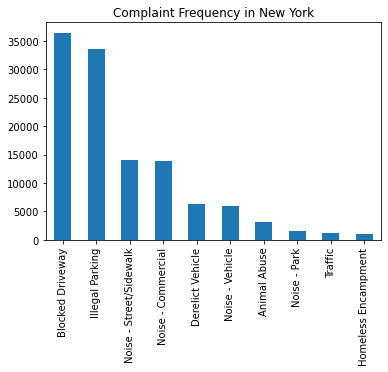

In [17]:
# Frequency chart for the ten most common complaints in Brooklyn
df_bkn = df.loc[df['City'] == 'Brooklyn']
df_bkn['Complaint Type'].value_counts().head(10).plot(kind='bar', title = 'Complaint Frequency in New York');

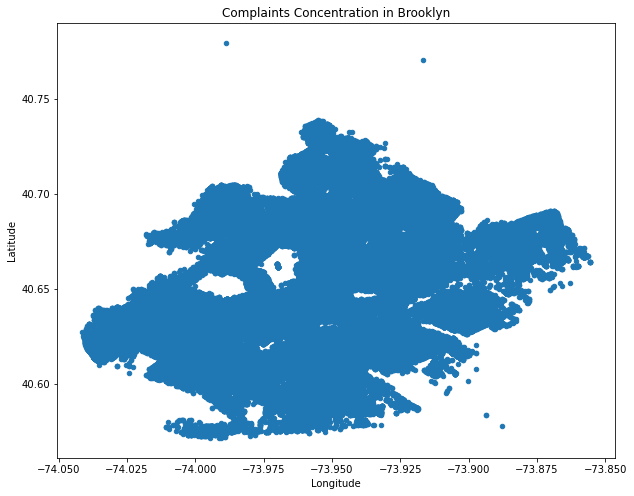

In [18]:
# Draw scatter plot for complaint concentration across Brooklyn
df_bkn[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaints Concentration in Brooklyn', figsize = (10, 8));


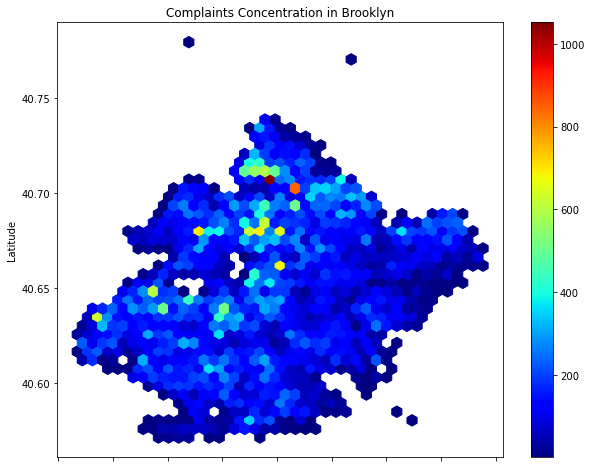

In [19]:
# Draw hexbin plot for complaint concentration across Brooklyn
df_bkn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (10, 8));

In [20]:
# Change date columns to YYYY-MM-DD format
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [21]:
#Check whether the date are in the correct order
df.loc[df['Created Date']>=df['Closed Date']].shape

(0, 48)

In [22]:
# Drop rows where 'Closed Date' is empty
df = df[df['Closed Date'].notnull()]

In [23]:
# Calculate resolution time in terms of days
df['Resolution Time'] = (df['Closed Date'] - df['Created Date']).dt.days
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Resolution Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0


In [24]:
# Resolution time according to complaint type
df.groupby('Complaint Type')['Resolution Time'].mean().sort_values()

Complaint Type
Agency Issues                 0.000000
Squeegee                      0.000000
Posting Advertisement         0.001473
Disorderly Youth              0.003175
Illegal Fireworks             0.005814
Noise - Commercial            0.005943
Noise - Park                  0.006359
Urinating in Public           0.007800
Noise - Vehicle               0.007875
Vending                       0.008363
Bike/Roller/Skate Chronic     0.008421
Noise - House of Worship      0.008427
Noise - Street/Sidewalk       0.008917
Drinking                      0.009972
Homeless Encampment           0.010248
Traffic                       0.010970
Blocked Driveway              0.011786
Illegal Parking               0.012964
Animal Abuse                  0.020513
Panhandling                   0.024615
Graffiti                      0.044586
Derelict Vehicle              0.065155
Animal in a Park             14.000000
Name: Resolution Time, dtype: float64